In [1]:
source("forestProcessV4.r")


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: GIGrvg

Loading required package: clue



In [2]:
setwd("~/git/Bayesian_forest_clustering/")

In [3]:
load(file="./data/yaleB10subjects.Rda")

In [4]:
y<- yaleB5subjects$y



In [5]:
true_membership<- as.numeric(yaleB5subjects$label)

In [6]:
n<- nrow(y)
p<- ncol(y)

In [376]:
p

[1] 2016

In [7]:
# y = y/ sqrt(rowSums(y**2))

In [8]:
clusteringAccu<- function(clustering,true_membership){
    n<- length(true_membership)
    sum(matchAtoB(clustering,true_membership)==true_membership)/n
    }

In [9]:
require("kernlab")
require("mclust")

Loading required package: kernlab

Loading required package: mclust

Package 'mclust' version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



In [127]:
require("ClusterR")

Loading required package: ClusterR

Loading required package: gtools


Attaching package: ‘gtools’


The following object is masked from ‘package:pracma’:

    logit


The following object is masked from ‘package:glmnet’:

    na.replace


The following object is masked from ‘package:igraph’:

    permute




In [571]:
res<- sapply(c(1:20), function(i){


km_fit<- kmeans(y,centers = 10,)$cluster

clusteringAccu(km_fit,true_membership)
    
        })

mean(res)
quantile(res, c(0.025,0.975))

[1] 0.1866878

2.5%     97.5% 
0.1655705 0.2153328

In [11]:
# mclust_fit1<- Mclust(y,modelNames = "EII",G = 10)
# # mclust_fit2<- Mclust(y,modelNames = "EEI",G = 10)
# mclust_fit3<- Mclust(y,modelNames = "VVI",G = 10)




In [12]:
require("glmnet")

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.1-4



In [13]:
W<- matrix(0,n,n)

In [14]:
for(i in c(1:n)){
    glmnet_fit<- glmnet(t(y[-i,]),y[i,],family = "gaussian",alpha=1,lambda=(1/p),standardize = FALSE,intercept=FALSE)
    W[i,-i]<- as.vector(glmnet_fit$beta*1)
    if(i%%50==0)
        print(i)
     flush.console()
    }

[1] 10
[1] 20
[1] 30
[1] 40
[1] 50
[1] 60
[1] 70
[1] 80
[1] 90
[1] 100
[1] 110
[1] 120
[1] 130
[1] 140
[1] 150
[1] 160
[1] 170
[1] 180
[1] 190
[1] 200
[1] 210
[1] 220
[1] 230
[1] 240
[1] 250
[1] 260
[1] 270
[1] 280
[1] 290
[1] 300
[1] 310
[1] 320
[1] 330
[1] 340
[1] 350
[1] 360
[1] 370
[1] 380
[1] 390
[1] 400
[1] 410
[1] 420
[1] 430
[1] 440
[1] 450
[1] 460
[1] 470
[1] 480
[1] 490
[1] 500
[1] 510
[1] 520
[1] 530
[1] 540
[1] 550
[1] 560
[1] 570
[1] 580
[1] 590
[1] 600
[1] 610
[1] 620
[1] 630


In [570]:

res<- sapply(c(1:20), function(i){
sc_fit<- as.numeric(specc(y,centers=10))
# adjustedRandIndex(true_membership,sc_fit)
clusteringAccu(sc_fit,true_membership)
    })

mean(res)
quantile(res, c(0.025,0.975))

[1] 0.3594295

2.5%     97.5% 
0.2587559 0.4320523

In [148]:
y2<- y%*%t(y)

In [569]:
res<- sapply(c(1:20), function(i){
sc_fit<- as.numeric(specc(as.kernelMatrix(y2),centers=10))
# adjustedRandIndex(true_membership,sc_fit)
clusteringAccu(sc_fit,true_membership)
    })

mean(res)
quantile(res, c(0.025,0.975))

[1] 0.3049128

2.5%     97.5% 
0.2812599 0.3455626

In [575]:
W_copy<- t(apply(W,1, function(x){
    t<- sort(x,decreasing = TRUE)[5]
    x*(x>=t)
}))

W2<- (W_copy%*%t(W_copy))
W2<- t(W2/sqrt(diag(W2)))/sqrt(diag(W2))

W_copy<- W_copy/sqrt(diag(abs(W_copy%*%t(W_copy))))

In [577]:
res<- sapply(c(1:20), function(i){

sc_fit<- kmeans(W,centers = 10,)$cluster
clusteringAccu(sc_fit,true_membership)
    
        })

mean(res)
quantile(res, c(0.025,0.975))



[1] 0.2497623

2.5%     97.5% 
0.1844295 0.3916403

In [578]:
W2<- W%*%t(W)
W2<- t(W2/sqrt(diag(W2)))/sqrt(diag(W2))

In [579]:
res<- sapply(c(1:20), function(i){
sc_fit<- as.numeric(specc(as.kernelMatrix( W2*(W2>0)),centers=10))
# adjustedRandIndex(true_membership,sc_fit)
clusteringAccu(sc_fit,true_membership)
    })

mean(res)
quantile(res, c(0.025,0.975))

[1] 0.6167987

2.5%     97.5% 
0.5313788 0.6957211

In [564]:
res<- sapply(c(1:20), function(i){
sc_fit<- as.numeric(specc(as.kernelMatrix( abs(W)+t(abs(W))),centers=10))
# adjustedRandIndex(true_membership,sc_fit)
clusteringAccu(sc_fit,true_membership)
    })


mean(res)
quantile(res, c(0.025,0.975))

[1] 0.5930269

2.5%     97.5% 
0.4614501 0.6893819

In [ ]:

fixedLogS<- matrix(0,n+1,n+1)
# fixedLogS[1:n,1:n]<-  log(W2*(W2>0)) + log(W2>0)
fixedLogS[1:n,1:n]<-  log(W2) + log(W2>0)

loglam = -4.5

fixedLogS[n+1,1:n]<- loglam #log(0.5)
fixedLogS[1:n,n+1]<- loglam #log(0.5)



In [419]:
fc_fit<- forestClust(W,useFixedLogS = TRUE, fixedLogS = fixedLogS,n_iter = 500,burnin = 0)

  |==================================================| 100%

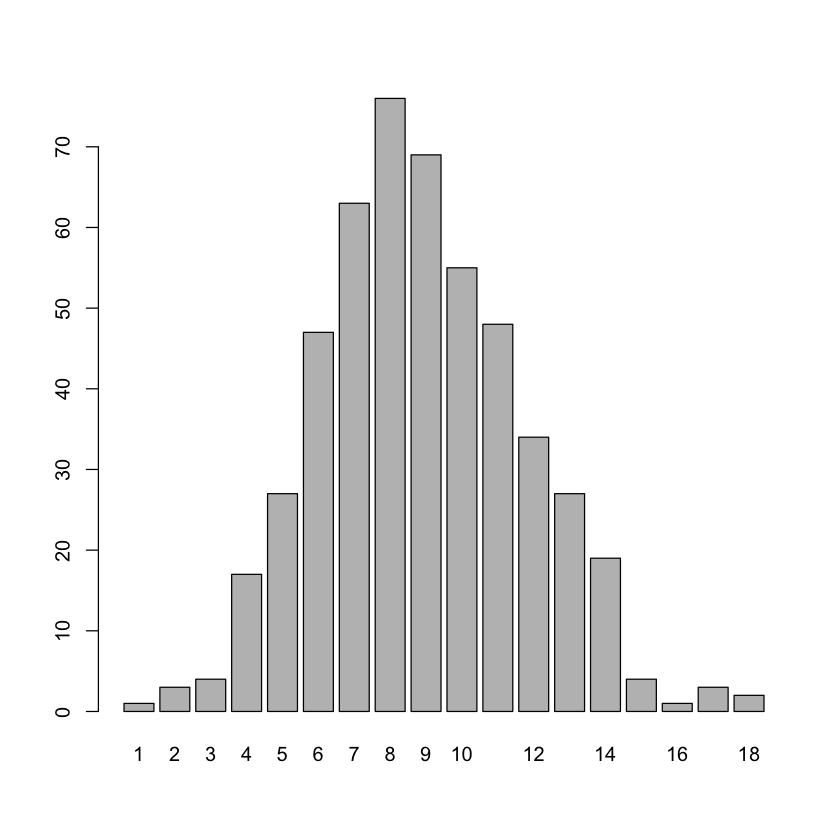

In [365]:
barplot(table(fc_fit$K))

In [567]:
res<- sapply(c(1:20), function(i){
    fc_fit_point_est <- as.numeric(specc(as.kernelMatrix( fc_fit$C_mat),centers=10))
    clusteringAccu(fc_fit_point_est,true_membership)
    })

mean(res)
quantile(res, c(0.025,0.975))

[1] 0.8257528

2.5%     97.5% 
0.7183439 0.9334390

In [620]:
library(imager)

Loading required package: magrittr


Attaching package: ‘magrittr’


The following objects are masked from ‘package:pracma’:

    and, mod, or



Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following object is masked from ‘package:spam’:

    display


The following object is masked from ‘package:kernlab’:

    R


The following object is masked from ‘package:igraph’:

    spectrum


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image




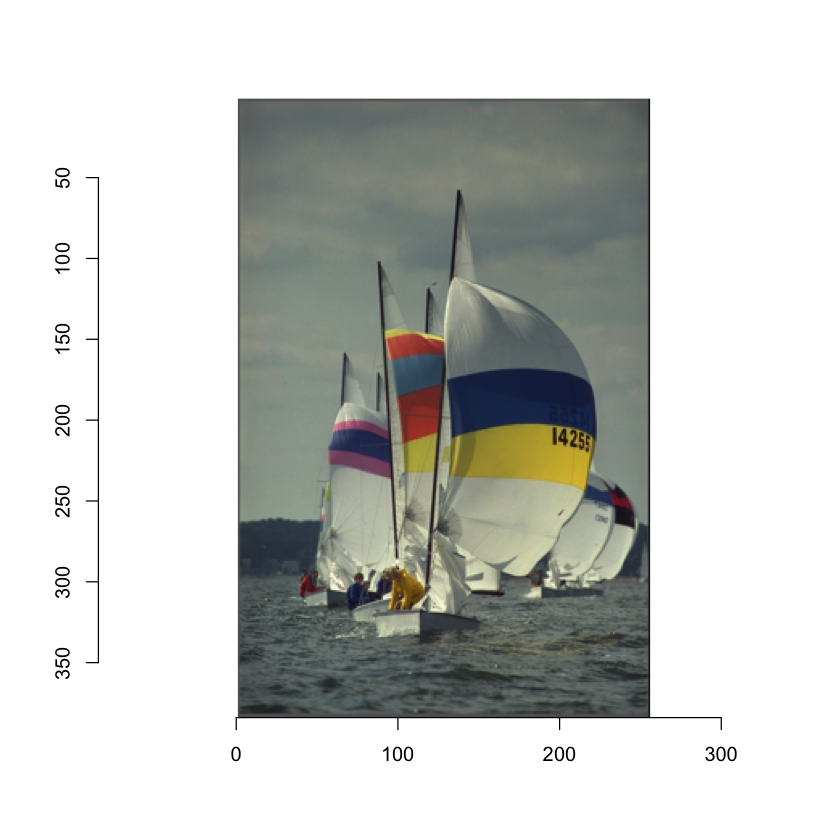

In [624]:
plot(boats)

[1] "cimg"         "imager_array" "numeric"

In [656]:
pick_mat <- y[1+64*2,]

new_h = 48
new_w = 42

mat<- matrix(pick_mat,new_w,new_h)

pdf("~/dropbox/Apps/Overleaf/spanning_tree_clustering/yale_face_1_s1.pdf",4,4)
plot( imrotate(as.cimg(mat),90),axes=FALSE)
dev.off()

pick_mat <- y[13+64*2,]

new_h = 48
new_w = 42

mat<- matrix(pick_mat,new_w,new_h)

pdf("~/dropbox/Apps/Overleaf/spanning_tree_clustering/yale_face_2_s1.pdf",4,4)
plot( imrotate(as.cimg(mat),90),axes=FALSE)
dev.off()

pick_mat <- y[35+64*2,]

new_h = 48
new_w = 42

mat<- matrix(pick_mat,new_w,new_h)

pdf("~/dropbox/Apps/Overleaf/spanning_tree_clustering/yale_face_3_s1.pdf",4,4)
plot( imrotate(as.cimg(mat),90),axes=FALSE)
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

In [657]:
pick_mat <- y[1+64*3,]

new_h = 48
new_w = 42

mat<- matrix(pick_mat,new_w,new_h)

pdf("~/dropbox/Apps/Overleaf/spanning_tree_clustering/yale_face_1_s2.pdf",4,4)
plot( imrotate(as.cimg(mat),90),axes=FALSE)
dev.off()

pick_mat <- y[13+64*3,]

new_h = 48
new_w = 42

mat<- matrix(pick_mat,new_w,new_h)

pdf("~/dropbox/Apps/Overleaf/spanning_tree_clustering/yale_face_2_s2.pdf",4,4)
plot( imrotate(as.cimg(mat),90),axes=FALSE)
dev.off()

pick_mat <- y[35+64*3,]

new_h = 48
new_w = 42

mat<- matrix(pick_mat,new_w,new_h)

pdf("~/dropbox/Apps/Overleaf/spanning_tree_clustering/yale_face_3_s2.pdf",4,4)
plot( imrotate(as.cimg(mat),90),axes=FALSE)
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

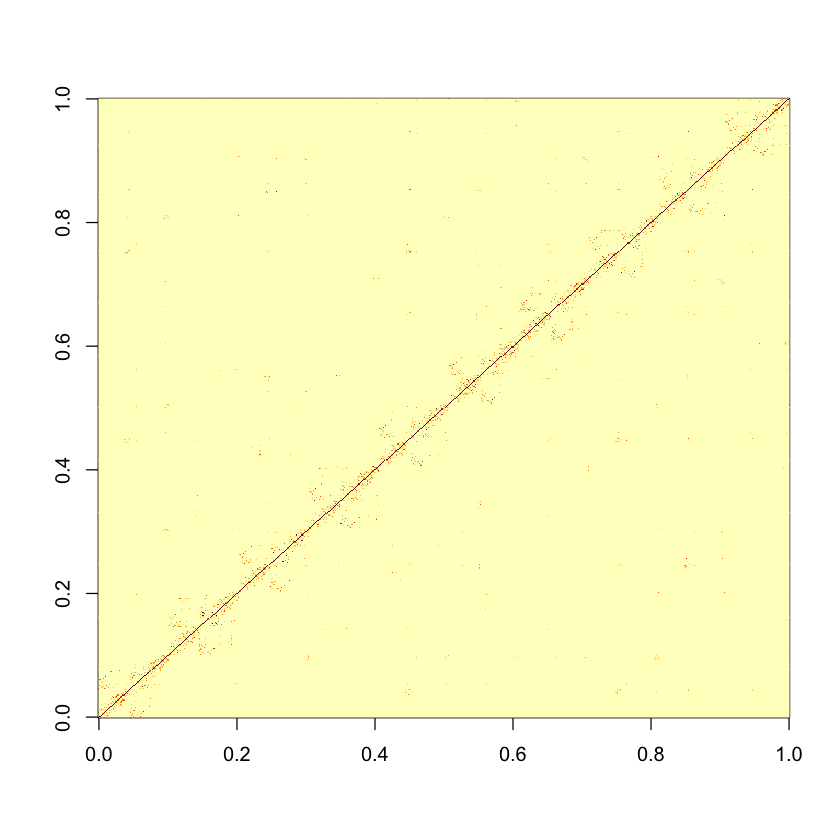

In [34]:
image(W2)

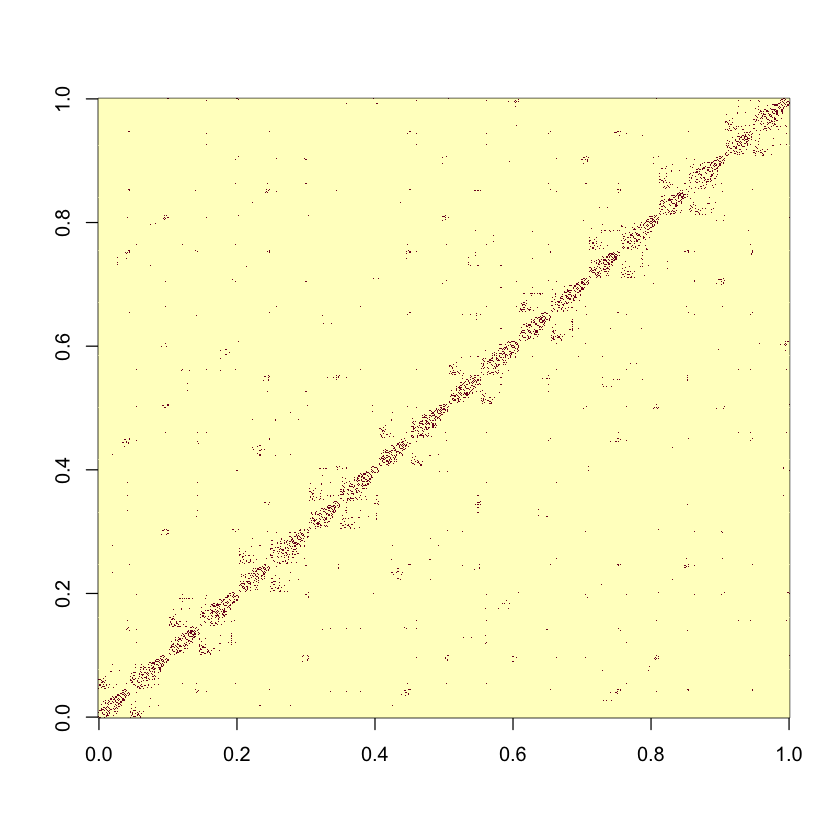

In [35]:
image(fc_fit$A_T_mat> 0.01)

In [586]:
require("fields")

Loading required package: fields

Loading required package: spam

Spam version 2.9-0 (2022-07-11) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:Matrix’:

    det


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Try help(fields) to get started.



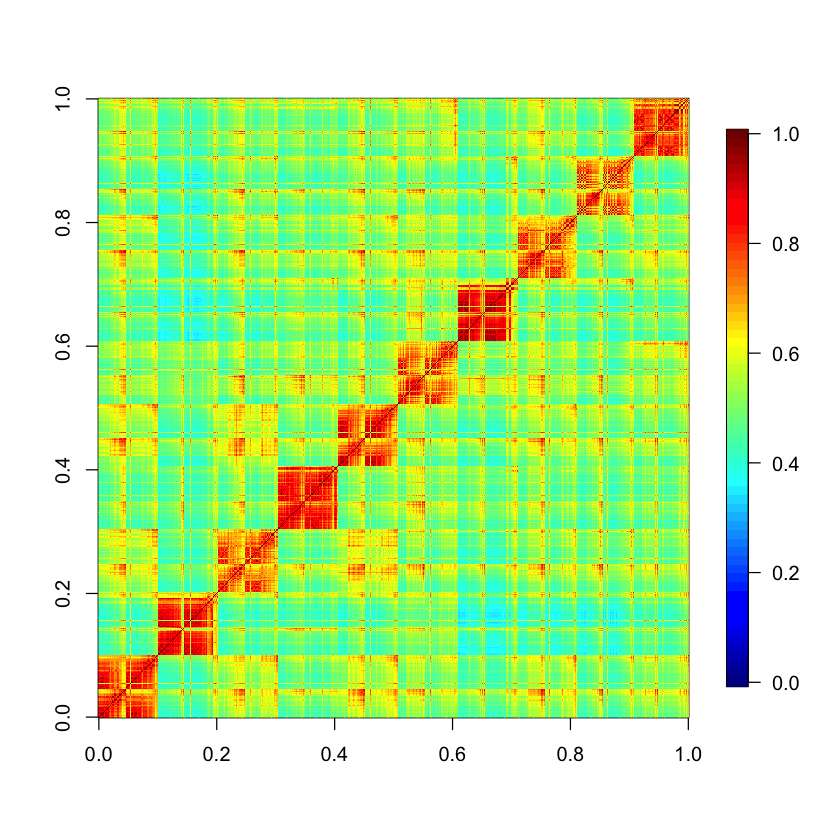

In [589]:
pdf("~/dropbox/Apps/Overleaf/spanning_tree_clustering/pos_sim_face.pdf",6,4)
image.plot(fc_fit$C_mat/500, zlim=c(0,1))
dev.off()

In [595]:
D<- as.matrix(dist(y,diag = TRUE,upper = TRUE))

In [603]:
pdf("~/dropbox/Apps/Overleaf/spanning_tree_clustering/pos_sim_face_euc_dist.pdf",6,4)
image.plot(D)
dev.off()

pdf 
  2

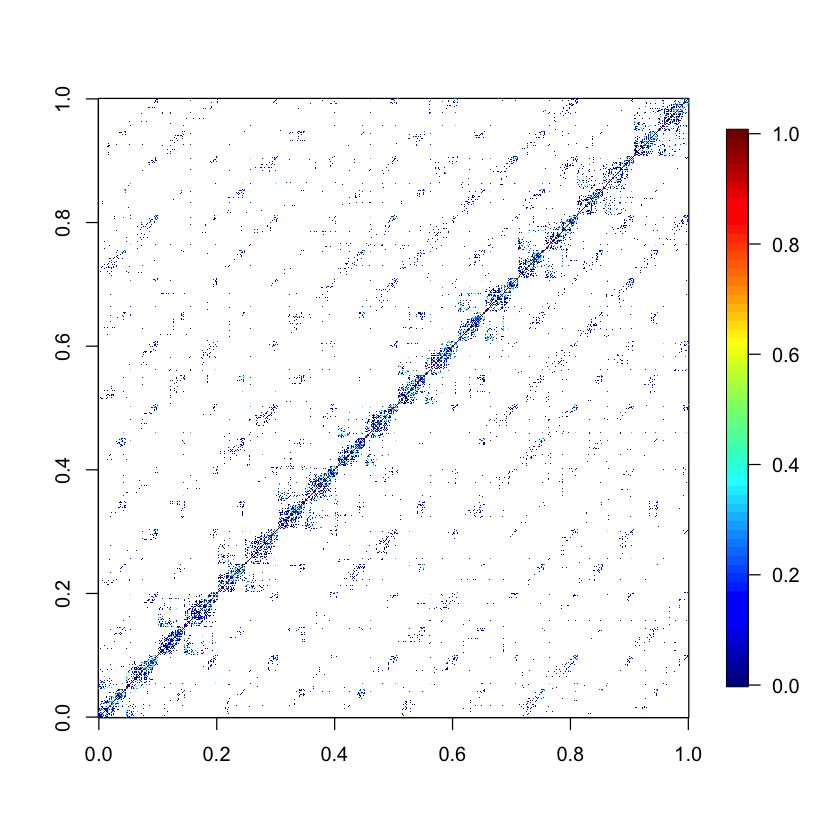

In [615]:
W2<- (W_copy%*%t(W_copy))
W2<- t(W2/sqrt(diag(W2)))/sqrt(diag(W2))

W2[W2<0.005]<- NaN

image.plot(W2)

In [616]:
pdf("~/dropbox/Apps/Overleaf/spanning_tree_clustering/pos_sim_face_W2.pdf",6,4)
image.plot(W2)
dev.off()

pdf 
  2

In [580]:
res<- sapply(c(1:20), function(i){
sc_fit<-  Mclust(y,G = 10,modelNames = "VII")$classification

# adjustedRandIndex(true_membership,sc_fit)
clusteringAccu(sc_fit,true_membership)
    })


mean(res)
quantile(res, c(0.025,0.975))

[1] 0.2456418

2.5%     97.5% 
0.2456418 0.2456418

In [581]:
res<- sapply(c(1:20), function(i){
sc_fit<- Mclust(y,G = 10,modelNames = "VEI")$classification
# adjustedRandIndex(true_membership,sc_fit)
clusteringAccu(sc_fit,true_membership)
    })


mean(res)
quantile(res, c(0.025,0.975))

[1] 0.2599049

2.5%     97.5% 
0.2599049 0.2599049

In [582]:
res<- sapply(c(1:20), function(i){
sc_fit<- Mclust(y,G = 10,modelNames = "EII")$classification
# adjustedRandIndex(true_membership,sc_fit)
clusteringAccu(sc_fit,true_membership)
    })


mean(res)
quantile(res, c(0.025,0.975))

[1] 0.2313788

2.5%     97.5% 
0.2313788 0.2313788

In [ ]:
require("HDclassif")

In [583]:
res<- sapply(c(1:20), function(i){
sc_fit<- hddc(y,K=10)$class

# adjustedRandIndex(true_membership,sc_fit)
clusteringAccu(sc_fit,true_membership)
    })


mean(res)
quantile(res, c(0.025,0.975))

[1] 0.2464342

2.5%     97.5% 
0.2057052 0.3014263

In [ ]:
res<- sapply(c(1:20), function(i){
sc_fit<- hddc(y,K=10,model = "AkjBQkDk")$class
# adjustedRandIndex(true_membership,sc_fit)
clusteringAccu(sc_fit,true_membership)
    })


mean(res)
quantile(res, c(0.025,0.975))